# Final Project
### Môn học: CSC17104 - Lập trình cho Khoa học dữ liệu
****

**Nhóm 26**
<table style='float:left;'>
    <tr>
        <th style='text-align:center;'>MSSV</th>
        <th style='text-align:center;'>Họ và Tên</th>
        <th style='text-align:center;'>Mức độ hoàn thành(%)</th>
    </tr>
    <tr>
        <td style='text-align:center;'>21120178</td>
        <td style='text-align:left;'>Văn Bá Bảo Huy</td>
        <td style='text-align:center;'>100%</td>
    </tr>
    <tr>
        <td style='text-align:center;'>21120071</td>
        <td style='text-align:left;'>Nguyễn Thị Thanh Hoa</td>
        <td style='text-align:center;'>100%</td>
    </tr>
    <tr>
        <td style='text-align:center;'>21120174</td>
        <td style='text-align:left;'>Nguyễn Thị Gái</td>
        <td style='text-align:center;'>100%</td>
    </tr>
</table>

### Environment check & Import nescessary packages

In [1]:
import sys
sys.executable
!pip install -q kaggle

In [2]:
import os
import numpy as np
import pandas as pd
import json
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from skimage import io

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", message="Matplotlib is currently using module://matplotlib_inline.backend_inline")

# **Phase 1**: Collecting Data

**Dataset**: Full TMDB Movies Dataset 2023 (930K Movies)<br>
**Kaggle**: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data

In [3]:
#Download data from Kaggle with api-key
notebook_dir = os.path.dirname(os.path.realpath("__file__"))
os.chdir(notebook_dir)
!mkdir kaggle
!touch kaggle/kaggle.json
api_json = {"username":"tyzenr","key":"08b25d2b177116a2cb7dfddc38ab964b"}
with open('kaggle/kaggle.json', 'w') as file:
    json.dump(api_json, file)
!chmod 600 kaggle/kaggle.json

with open('kaggle/kaggle.json', 'r') as file:
    api_json = json.load(file)

os.environ['KAGGLE_USERNAME'] = api_json['username']
os.environ['KAGGLE_KEY'] = api_json['key']

import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('asaniczka/tmdb-movies-dataset-2023-930k-movies', path='.', unzip=True)

'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


**1. Dữ liệu về chủ đề gì? Nguồn dữ liệu?**<br>
- Chủ đề dữ liệu: Bộ dữ liệu của hơn 930.000 bộ phim trong tập dữ liệu TMDB.<br>
- Nguồn dữ liệu: Kaggle
<br>

**2. Kiểm tra vấn đề bản quyền của tập dữ liệu.**<br>
- `CC0: Public Domain` - No Right Reserved
- CC0 cho phép các nhà khoa học, nhà giáo dục, nghệ sĩ, những người sáng tạo và chủ sở hữu khác của nội dung được bảo vệ bản quyền hoặc cơ sở dữ liệu *từ bỏ* những lợi ích đó đối với tác phẩm của họ và do đó đặt chúng hoàn toàn nhất có thể trong phạm vi công cộng, để những người khác có thể tự do xây dựng, nâng cao và tái sử dụng tác phẩm cho bất kỳ mục đích nào mà không bị hạn chế theo luật bản quyền hoặc cơ sở dữ liệu.
<br>

**3. Tác giả của tập dữ liệu đã thu thập bằng cách nào?** <br>
- Dữ liệu được thu thập từ TMDB Open API.
<br>

# **Phase 2**: Exploring Data

### 2.0 Đọc dữ liệu

In [4]:
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
df.head(3)

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   

   original_language   original_title  \
0                 en        Inception   
1                 en     Interstellar   
2                 en  The Dark Knight   

                                            overview popularity  \
0  Cobb, a skilled thief who commits corporate es...     83.952   
1  The adventures of a group of explorers who mak...    140.241   
2  Batman raises the stakes in his war on crime. ...    130.643   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   
2      Drama, Action, Crime, Thriller   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   

                     spoken_languages  
0  English, French, Japanese, Swahili  
1                             English  
2                   English, Mandarin  

[3 rows x 23 columns]

### 2.1 Có bao nhiêu hàng và bao nhiêu cột?

In [5]:
row, col = df.shape[0], df.shape[1]
print('Dữ liệu có', row, 'hàng và', col, 'cột.')

Dữ liệu có 973824 hàng và 23 cột.


###  2.2 Ý nghĩa của mỗi hàng là gì?

Theo file mô tả dữ liệu và theo quan sát sơ bộ về dữ liệu thì một dòng cung cấp thông tin  chi tiết về phim, bao gồm như: tiêu đề, xếp hạng, ngày phát hành, doanh thu, thể loại,  ngân sách, áp phích, ngôn ngữ, công ty sản xuất, quốc gia, số phiếu bầu TMDB và trung bình phiếu bầu, đánh giá,...  Các dòng đều mang ý nghĩa giống nhau

### 2.3 Có 'hàng trùng lặp' không?

### 2.4 Ý nghĩa của từng cột là gì?

In [6]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

**Ý nghĩa từng cột**:

01. `id`: TMDB ID.
02. `title`: Tiêu đề của phim (bằng tiếng Anh).
03. `vote_average`: Điểm đánh giá trung bình trên trang TMDB.
04. `vote_count`: Số lượng đánh giá.
05. `status`:  Tình trạng bộ phim (đã công chiếu, lên kế hoạch công chiếu, ...).
06. `release_date`: Ngày công chiếu phim.
07. `revenue`: Doanh thu phim.
08. `runtime`: Thời lượng của phim.
09. `adult`: Bộ phim chỉ phù hợp cho người lớn (trên 18 tuổi).
10. `backdrop_path`: Đường dẫn đến ảnh nền phim.
12. `budget`: Kinh phí thực hiện phim.
13. `homepage`: Trang web chính thức của bộ phim.
14. `imdb_id`: IMDB ID.
15. `original_language`: Ngôn ngữ gốc của phim.
16. `original_title`: Tiêu đề gốc bộ phim.
17. `overview`: Mô tả ngắn về bộ phim.
18. `popularity`: Điểm đánh giá mức độ phổ biến của phim.
19. `poster_path`: Đường dẫn đến poster phim.
20. `tagline`:  Khẩu hiệu phim.
21. `genres`: Thể loại phim.
22. `production_companies`: Công ty sản xuất.
23. `production_countries`: Nước sản xuất.
24. `spoken_languages`: Ngôn ngữ sử dụng trong phim.

### 2.5 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973824 entries, 0 to 973823
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    973824 non-null  int64  
 1   title                 973813 non-null  object 
 2   vote_average          973824 non-null  float64
 3   vote_count            973824 non-null  int64  
 4   status                973824 non-null  object 
 5   release_date          873015 non-null  object 
 6   revenue               973824 non-null  int64  
 7   runtime               973824 non-null  int64  
 8   adult                 973824 non-null  bool   
 9   backdrop_path         280827 non-null  object 
 10  budget                973824 non-null  int64  
 11  homepage              105919 non-null  object 
 12  imdb_id               564175 non-null  object 
 13  original_language     973824 non-null  object 
 14  original_title        973813 non-null  object 
 15  

In [8]:
def object_dtype(o):
    
    dtypes = set(o.apply(type))
    
    return dtypes

for col in df.columns:
    print("Kiểu dữ liệu của column: %10s: %s" % (col, object_dtype(df[col])))

Kiểu dữ liệu của column:         id: {<class 'int'>}
Kiểu dữ liệu của column:      title: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu của column: vote_average: {<class 'float'>}
Kiểu dữ liệu của column: vote_count: {<class 'int'>}
Kiểu dữ liệu của column:     status: {<class 'str'>}
Kiểu dữ liệu của column: release_date: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu của column:    revenue: {<class 'int'>}
Kiểu dữ liệu của column:    runtime: {<class 'int'>}
Kiểu dữ liệu của column:      adult: {<class 'bool'>}
Kiểu dữ liệu của column: backdrop_path: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu của column:     budget: {<class 'int'>}
Kiểu dữ liệu của column:   homepage: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu của column:    imdb_id: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu của column: original_language: {<class 'str'>}
Kiểu dữ liệu của column: original_title: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu của column:   overview: {<class 'str'>, <class 'float'>}
Kiểu dữ liệu

**Nhận xét:**  
- Cột `release_date` đang có dtype là str và float. Để đúng về ý nghĩa, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Hầu hết các cột có giá trị `float` là vì các cột có giá trị `nan`

### 2.6 Với mỗi cột số, các giá trị được phân bố như thế nào?
- Phần trăm giá trị còn thiếu là bao nhiêu?
- Tối thiểu? tối đa? Chúng có bất thường không?

### 2.7 Với mỗi cột phân loại, các giá trị được phân bổ như thế nào?
- Phần trăm giá trị còn thiếu là bao nhiêu?
- Có bao nhiêu giá trị khác nhau? Hiển thị một số giá trị đó.
- Chúng có bất thường không?

In [9]:
object_df = df.select_dtypes(include='object')
obj_col_df = pd.DataFrame( index=['missing_ratio', 'diff_value', 'values'], columns=object_df.columns)

obj_col_df.loc['missing_ratio'] = (object_df.isna().sum() / object_df.size) *100
obj_col_df.loc['diff_value']    = object_df.nunique()
obj_col_df.loc['values']        = [object_df[col].sample(min(5, obj_col_df.loc['diff_value'][col])).tolist() for col in object_df.columns]

obj_col_df

title  \
missing_ratio                                           0.000075   
diff_value                                                840456   
values         [The Return, A Conta, Learning How to Wrestle ...   

                                                          status  \
missing_ratio                                                0.0   
diff_value                                                     6   
values         [Released, Released, Released, Released, Relea...   

                                                 release_date  \
missing_ratio                                        0.690125   
diff_value                                              42176   
values         [2018-04-06, nan, nan, 2021-06-05, 2021-12-03]   

                                                   backdrop_path  \
missing_ratio                                           4.744163   
diff_value                                                278545   
values         [/lzeXlaYiMIbAyDAo2fLCre61fkE.jpg, nan, nan, /...   

                                homepage  \
missing_ratio                    5.94156   
diff_value                         99858   
values         [nan, nan, nan, nan, nan]   

                                                         imdb_id  \
missing_ratio                                           2.804401   
diff_value                                                564041   
values         [tt9046896, tt0272036, tt15210162, tt0027068, ...   

                  original_language  \
missing_ratio                   0.0   
diff_value                      173   
values         [ar, en, fr, en, en]   

                                                  original_title  \
missing_ratio                                           0.000075   
diff_value                                                872134   
values         [فرار از زندگی, Under Arrest, Your Mommy Kills...   

                                                        overview  \
missing_ratio                                           1.185738   
diff_value                                                782263   
values         [A group of children is trying to solve a myst...   

                                                     poster_path  \
missing_ratio                                           1.779925   
diff_value                                                710099   
values         [/6K6p8MxKn69Q7ESuablk4jKIotD.jpg, nan, /uA0DR...   

                                                         tagline  \
missing_ratio                                           5.705856   
diff_value                                                135649   
values         [nan, nan, nan, The devil’s in the divorce pap...   

                                           genres  \
missing_ratio                            2.406383   
diff_value                                  12567   
values         [Thriller, Music, nan, Drama, nan]   

                               production_companies  \
missing_ratio                              3.453745   
diff_value                                   190523   
values         [nan, Satel Film, nan, ETIC, Difilm]   

                                            production_countries  \
missing_ratio                                           2.656928   
diff_value                                                  9757   
values         [nan, United States of America, nan, Italy, Un...   

                                   spoken_languages  
missing_ratio                              2.602147  
diff_value                                     6872  
values         [English, nan, nan, English, German]

# **Phase 3**: Preprocessing & Asking Meaningful questions
Yêu cầu:
- Số lượng câu hỏi đặt ra cần lớn hơn hoặc bằng số lượng thành viên ($\ge 3$)
- Câu hỏi đặt ra cần có ý nghĩa (tác dụng của việc tìm kiếm câu trả lời cho câu hỏi đó) và không được quá dễ 🙂
- Chú ý đến chất lượng của từng câu hỏi, không phải số lượng câu hỏi.
- Trong file Notebook, với mỗi câu hỏi cần thể hiện được:
    - Nội dung câu hỏi
    - Ý nghĩa của câu hỏi

## **3.0** Preprocessing

#### Remove duplicated/meaningless rows and columns

Xóa các dòng trùng lặp: ở phần 2.3 ta đã phát hiện dữ liệu có các dòng trùng lặp, vì vậy ta sẽ tiến hành xóa các dòng đó.

In [10]:
df.drop_duplicates(inplace=True)

Xóa các cột không phù hợp (ở đây ta tiến hành xóa các cột không sử dụng trong quá trình xử lí dữ liệu và đặt câu hỏi.<br>
Ta tiến hành xóa các cột:<br>
- `backdrop_path`: Đường dẫn đến ảnh nền phim - Do để hiển thị ta đã có cột `poster_path`
- `homepage`: đường dẫn đến trang web chính thức của phim.
- `imdb_id`: IMDB ID - Do quá trình xử lí không lấy các thông tin trên IMDB.

In [11]:
df = df.drop(['backdrop_path', 'homepage', 'imdb_id'], axis=1)

Vì có chứa các thông tin không phù hợp, ta sẽ loại bỏ các dòng dữ liệu của cột `adult` có giá trị **True** và sau đó xóa cột này đi.

In [12]:
df = df[df['adult'] == False]
df = df.drop('adult', axis=1)

#### Handle missing data & Convert data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883217 entries, 0 to 973823
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    883217 non-null  int64  
 1   title                 883207 non-null  object 
 2   vote_average          883217 non-null  float64
 3   vote_count            883217 non-null  int64  
 4   status                883217 non-null  object 
 5   release_date          789592 non-null  object 
 6   revenue               883217 non-null  int64  
 7   runtime               883217 non-null  int64  
 8   budget                883217 non-null  int64  
 9   original_language     883217 non-null  object 
 10  original_title        883207 non-null  object 
 11  overview              728193 non-null  object 
 12  popularity            883217 non-null  float64
 13  poster_path           636299 non-null  object 
 14  tagline               128074 non-null  object 
 15  genre

In [14]:
df['release_date']= pd.to_datetime(df['release_date'])


#### Visualize some data
Ở phần này ta sẽ biểu diễn một vài dữ liệu được cung cấp và đưa ra các nhận xét.

**Số lượng phim được sản xuất qua các năm.**

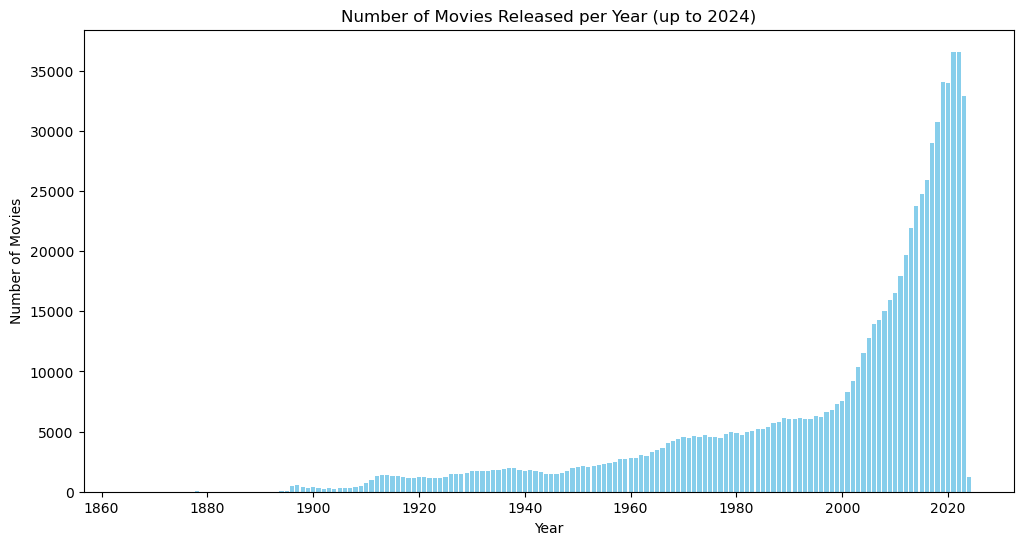

In [15]:
movies_per_year = df['release_date'].dt.year.value_counts().sort_index()
current_year = pd.to_datetime('now').year
movies_per_year = movies_per_year[movies_per_year.index <= current_year]

#Show
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year (up to {})'.format(current_year))
plt.show()

**Word cloud từ title (tiêu đề) của các bộ phim**<br>
*Nhận xét*:
- Ta thấy các chủ đề "Love - Tình yêu", "Live, Life - Cuộc sống" là hai chủ đề được các bộ phim khai thác nhiều nhất.
- Tiếp theo đó là các chủ đề được khai thác nhiều như: Dream, Christmas, Time, World, ...

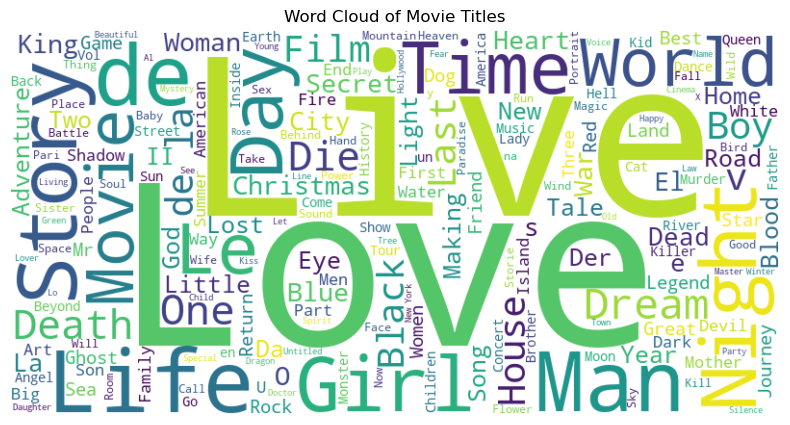

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'].dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

## **3.1** Asking meaningful question

<table style='float:left;'>
    <tr>
        <th style='text-align:center;'>STT</th>
        <th style='text-align:center;'>Nội dung</th>
        <th style='text-align:center;'>Trình bày</th>
    </tr>
    <tr>
        <td style='text-align:center;'>1</td>
        <td style='text-align:left;'>Nội dung</td>
        <td style='text-align:center;'><a href='#cauhoi_1'>C1</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>2</td>
        <td style='text-align:left;'>Thể loại phim nào được yêu thích nhất qua các năm trong giai đoạn từ 2000-2023?</td>
        <td style='text-align:center;'><a href='#cauhoi_2'>C2</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>3</td>
        <td style='text-align:left;'>Cho biết 10 nước có tổng số phim nhiều nhất ở TMDB qua từng năm là những nước nào?</td>
        <td style='text-align:center;'><a href='#cauhoi_3'>C3</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>4</td>
        <td style='text-align:left;'>Nội dung</td>
        <td style='text-align:center;'><a href='#cauhoi_4'>C4</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>5</td>
        <td style='text-align:left;'>Với mỗi phim mà người dùng tìm kiếm hoặc đã xem, ta cần đề xuất thêm các phim nào với nội dung/thể loại/... tương tự cho người dùng?</td>
        <td style='text-align:center;'><a href='#cauhoi_5'>C5</a></td>
    </tr>
</table>

# **Phase 4**: Analyzing data to answer each question

### **Câu hỏi 1**: ghi nội dung ở đây<a name="cauhoi_1"></a>

**Ý nghĩa:**

### **Câu hỏi 2**: Thể loại phim nào được yêu thích nhất qua các năm trong giai đoạn từ 2000-2023?<a name="cauhoi_2"></a>

**Ý nghĩa:**
- Cho phép nhận xét về xu hướng thay đổi sự ưa thích của khán giả đối với các thể loại phim qua thời gian trong các năm gần đây từ đó giúp đội ngũ sản xuất có thể  nắm bắt nhu cầu đa dạng của khán giả.
- Cung cấp thông tin hữu ích cho ngành công nghiệp điện ảnh để điều chỉnh chiến lược sản xuất và quảng cáo dựa trên sở thích của khán giả. Các nhà sản xuất và đài truyền hình có thể sử dụng thông tin này để quyết định đầu tư vào các dự án có khả năng nhận được sự ủng hộ mạnh mẽ từ khán giả.

**Thực hiện:**
- Tạo một dataframe mới từ việc phân tách thể loại và chỉ lấy dữ liệu là bộ phim ra mắt trong năm 2000-2023 để có dữ liệu sẵn sàng cho phân tích.
- Nhóm dữ liệu theo năm và thể loại, tính trung bình sự phổ biến của mỗi thể loại trong mỗi năm.
- Vẽ biểu đồ để hiển thị  phân bố sự phổ biến của thể loại qua các năm (2020-2023).

In [17]:
import re


df1 = df.copy()
df1['genres'] = df1['genres'].apply(lambda x: re.split(', |,', str(x)))
df1['genres'] = df1['genres'].apply(lambda x: [] if str(x) == "['nan']" else x)

df1['release_year'] = df1['release_date'].dt.year
df1 = df1[(df1['release_year'] >= 2000) & (df1['release_year'] <= 2023)]

df_genres = df1.assign(genres=df1['genres'])
df_genres = df_genres.explode('genres')
df_year = df_genres.groupby(['release_year', 'genres'])[['popularity']].mean().reset_index()

df_year = df_year.sort_values(by=['release_year', 'popularity'], ascending=False)
df_year


release_year           genres  popularity
438        2023.0        Adventure   29.879932
437        2023.0           Action   21.503726
451        2023.0  Science Fiction   13.667114
453        2023.0         Thriller   13.454916
449        2023.0          Mystery   11.003753
..            ...              ...         ...
2          2000.0        Animation    2.537072
9          2000.0          History    2.266977
15         2000.0         TV Movie    2.105461
11         2000.0            Music    1.344352
5          2000.0      Documentary    0.886120

[456 rows x 3 columns]

Biểu đồ cho thấy sự phổ biến của các thể loại phim qua các năm từ 2000 đến 2023.


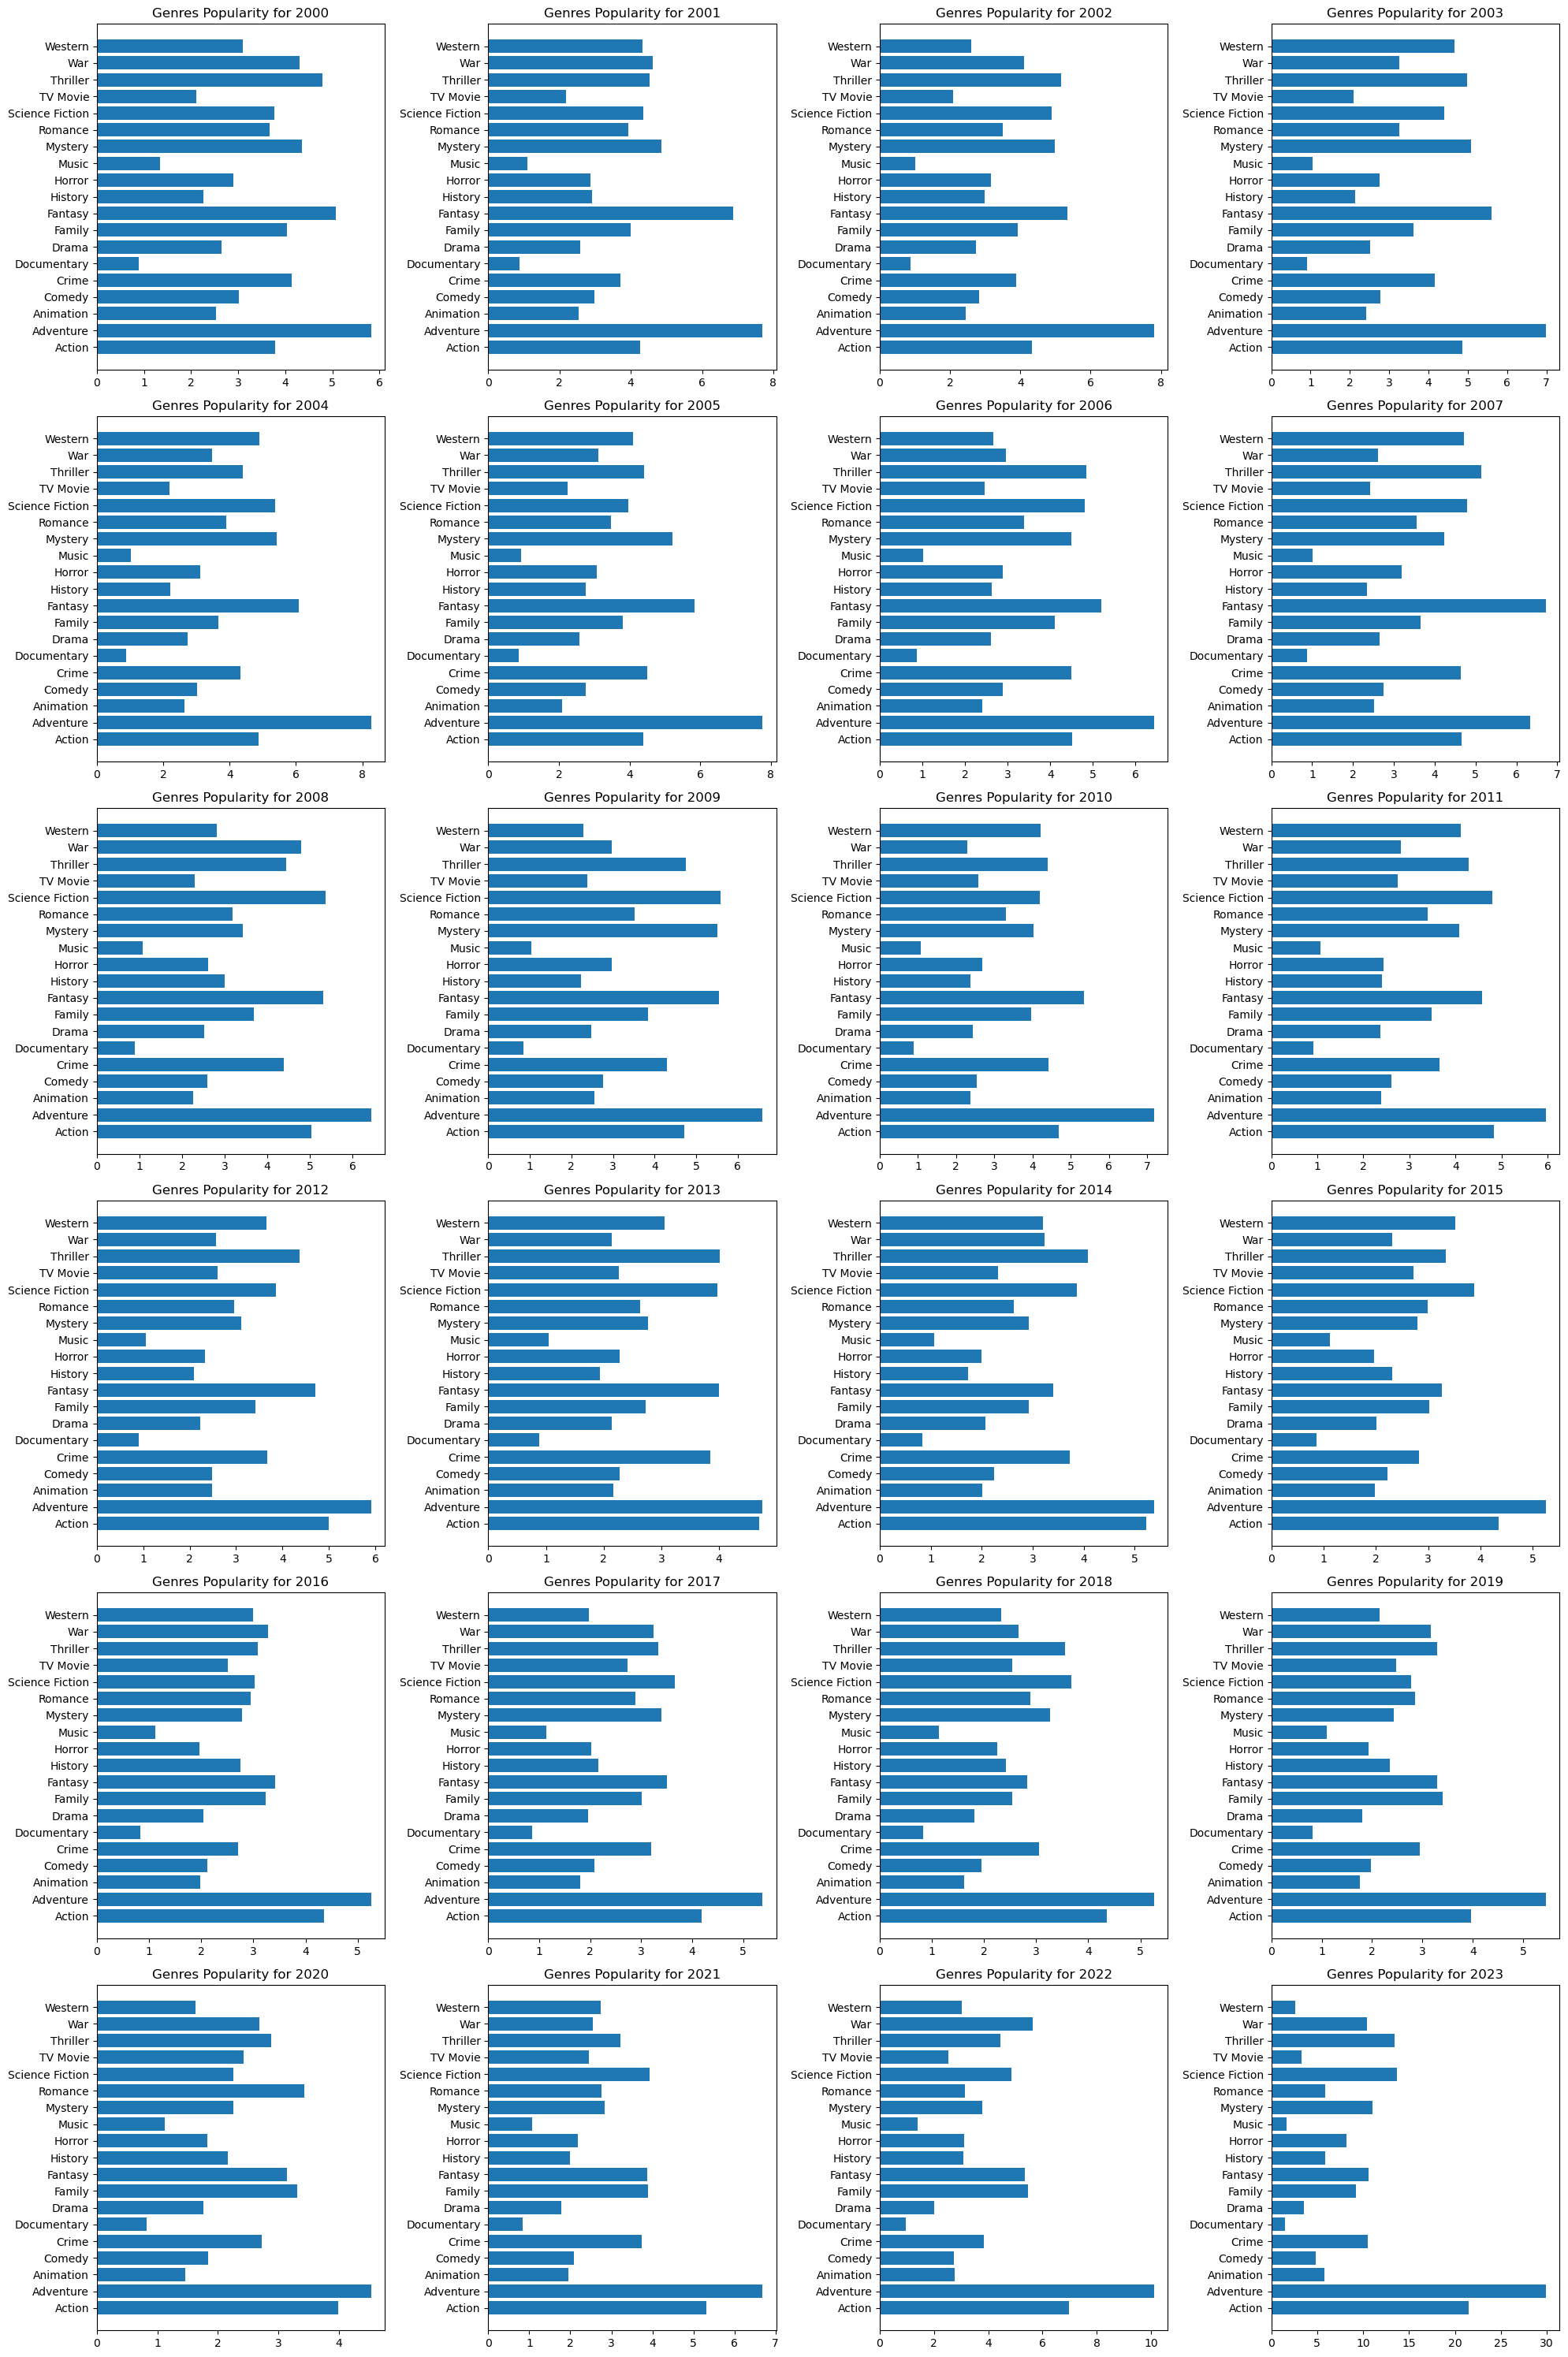

In [18]:
fig, axs = plt.subplots(6, 4, figsize=(20, 30))

for i, ax in enumerate(axs.flatten()):
    year = 2000 + i
    df_current_year = df_year[df_year['release_year'] == year]
    genre_counts = df_current_year.groupby('genres')['popularity'].mean()
    
    ax.barh(genre_counts.index, genre_counts.values)
    ax.set_title(f"Genres Popularity for {year}")

plt.tight_layout()
plt.show()

**Nhận xét:**
- Từ năm 2000-2023, phim thuộc thể loại `Adventure` gần như luôn phổ biến nhất ( chỉ trừ năm 2007 là `Fantasty`).
- Có thể thấy rằng phim thuộc thể loại Adventure luôn được yêu thích nhất trong những năm gần đây. Có lẽ điều đó giải thích tại sao gần đây các nhà sản xuất phim lại thích thể loại Adventure hơn những thể loại khác: chúng có độ phổ biến cao hơn các thể loại khác, hiện tại đang là xu hướng.

Vẽ biểu đổ đường để thấy rõ hơn sự thay đổi độ phổ biến qua mỗi năm.

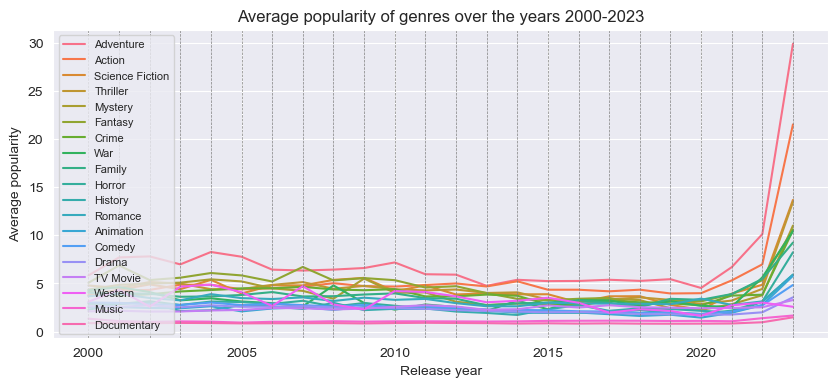

In [19]:

def my_lineplot(my_genres_list):
    
    # filter dataframe to contain only wanted genres:
    my_dataframe = df_year[df_year['genres'].isin(my_genres_list)]
    
    # create lineplot
    plt.figure(figsize=(10,4))
    sns.set_style("darkgrid")
    sns.lineplot(data=my_dataframe, x='release_year', y='popularity', hue='genres')
    
    # Add vertical lines for each year
    for year in my_dataframe['release_year'].unique():
        plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)
    
    plt.title('Average popularity of genres over the years 2000-2023')
    plt.xlabel('Release year')
    plt.ylabel('Average popularity')
   
    plt.legend(loc='upper left', fontsize=8)

my_lineplot(df_year['genres'].unique())
plt.show()


**Nhận xét:**
- Có một sự biến động đáng kể về mức phổ biến của các thể loại phim qua các năm. Điều này có thể phản ánh sự thay đổi trong sở thích và xu hướng của khán giả  trong từng giai đoạn. Một số năm nhất định, như năm 2022-2034, có sự tăng trưởng đặc biệt mạnh mẽ cho một số thể loại như Adventure, Action, và Science Fiction. Các thể loại như Music, Documentary, Western có thể ít phổ biến hơn và có sự biến động lớn.
- Adventure, Action, và Science Fiction thường xuyên nằm trong nhóm các thể loại có mức phổ biến cao nhất.
- Mức phổ biến của các thể loại như Documentary, History, Music, TV Movie thường xuyên ở vị trí thấp.
- Phân bố của mức phổ biến giữa các thể loại thường không đều, với một số thể loại chiếm lĩnh thị trường trong khi các thể loại khác ít phổ biến hơn.

Thay vì mức độ phổ biến trung bình, có thể làm tương tự khi xem xét các thể loại dưới dạng `vote_average` để kiểm tra liệu độ phổ biến cao thì điểm đánh cao hay thấp.

Ta xác định giá trị lớn nhất của cột 'vote_average' cho mỗi năm trong khoảng thời gian từ năm 2000 đến 2023 trong  df_genres để tìm thể loại có điểm đánh giá trung bình cao nhất trong khoảng thời gian này.

In [20]:
df_genre_grouped_va = df_genres.groupby(['release_year','genres'])['vote_average'].mean()
df_genre_grouped_va2 = df_genre_grouped_va.to_frame().groupby(level='release_year')['vote_average'].nlargest(1).reset_index(level=0, drop=True).reset_index()
df_genre_grouped_va2 = df_genre_grouped_va2[(df_genre_grouped_va2['release_year'] < 2024) & (df_genre_grouped_va2['release_year'] > 1999)]
df_genre_grouped_va2

release_year     genres  vote_average
0         2000.0  Adventure      4.710332
1         2001.0  Adventure      4.763177
2         2002.0    Western      5.498417
3         2003.0  Adventure      5.251299
4         2004.0  Adventure      4.810455
5         2005.0  Adventure      4.886198
6         2006.0      Crime      4.634013
7         2007.0  Adventure      4.722366
8         2008.0      Crime      4.516026
9         2009.0    Mystery      4.621716
10        2010.0  Adventure      4.659490
11        2011.0   TV Movie      4.555488
12        2012.0   TV Movie      4.488379
13        2013.0   TV Movie      4.582656
14        2014.0   TV Movie      4.837091
15        2015.0   TV Movie      4.882459
16        2016.0   TV Movie      4.767197
17        2017.0   TV Movie      4.947606
18        2018.0   TV Movie      4.966430
19        2019.0   TV Movie      5.136561
20        2020.0   TV Movie      4.695046
21        2021.0   TV Movie      4.889367
22        2022.0   TV Movie      4.842970
23        2023.0   TV Movie      3.517051

**Nhận xét:**
- Thể loại `Adventure` không chỉ phổ biến mà còn đạt điểm đánh giá trung bình cao, chứng tỏ sự ưa chuộng từ cả khán giả và giới phê bình.
- Thể loại phim `TV Movie` được đánh giá cao nhất từ năm 2011 đến 2023 dù mức độ phổ biến trung binh trong những năm này chỉ khá thấp so với các thể loại khác. Có thể xuất phát từ nhiều nguyên nhân như sự hạn chế trong quảng bá,  thiếu sự đa dạng trong nội dung, không kịp thời theo kịp xu hướng hiện đại trong ngành công nghiệp giải trí.  Từ những điều này có thể làm cơ sở cho những quyết định về chiến lược quảng bá và tiếp thị để tăng cường sự nhận biết và phổ biến của thể loại này.
  


### **Câu hỏi 3**: 10 nước có tổng số phim nhiều nhất ở TMDB qua từng năm là những nước nào?<a name="cauhoi_3"></a>

**Ý nghĩa:**
- Việc tìm ra câu trả lời cho câu hỏi này sẽ giúp ta có cái nhìn tổng quan về tình hình các nước trên thế giới và phán đoán khả năng phát triển của Việt Nam:
>*Thế giới*: Mặc dù 10 nước trên có số lượng phim trên TMDB rất cao, và ta sẽ cần xem xét môi trường cạnh tranh khốc liệt như thế nào.  
>*Việt Nam*: Kiểm tra xem Viêt Nam so với thế giới như thế nào, hiểu được việc phim Việt Nam khi ra môi trường thế giới sẽ đối mặt với những vấn đề gì.
- Với việc phân tích này, chúng ta cũng phần nào nắm bắt được thị trường mà TMDB tập trung vào.

**Các bước thực hiện:**
- Đầu tiên ta sẽ lọc ra nước có tổng số phim trên TMDB nhiều nhất rồi từ đó vẽ biểu đồ miền và biểu đồ đường để hiểu rõ mức chênh lệch về tổng số phim để xem tình hình giữa các nước có cạnh tranh như thế nào và TMDB đang chuyển thêm thị trường nào.
- Sau đó mới tiến hành xem xét tình hình sản xuất phim được đánh giá cao ở Việt Nam.

Trong bước này ta sẽ tìm ra 10 nước có tổng số lượng phim nhiều nhất ở TMDB

In [21]:
import re
df1 = df.copy()
df1['production_countries']=df1['production_countries'].apply(lambda x:re.split(', |,',str(x)))
#Fix nan thành mảng rỗng
df1['production_countries']=df1['production_countries'].apply(lambda x:[] if str(x)=="['nan']" else x)
df1['year_release'] = df1['release_date'].dt.year
df1 = df1[(df1['year_release'] >= 1950) & (df1['year_release'] <= 2023)]
top_10_countries = df1['production_countries'].explode().value_counts().head(10)
top_10_countries_df = pd.DataFrame({'Country': top_10_countries.index, 'Count': top_10_countries.values})
top_10_country = top_10_countries_df.loc[:,'Country']
top_10_country

0    United States of America
1                      France
2                     Germany
3                       Japan
4              United Kingdom
5                      Canada
6                       India
7                       Italy
8                      Brazil
9                       Spain
Name: Country, dtype: object

Chuyển danh sách về bảng theo từng năm và theo từng nước

In [22]:
df_all = df.copy()
df_all['year_release'] = df_all['release_date'].dt.year
df_all = df_all[(df_all['year_release'] >= 1950) & (df_all['year_release'] <= 2023)]


def unique(x):
    x['production_countries']=x['production_countries'].apply(lambda x:re.split(', |,',str(x)))
    x['production_countries']=x['production_countries'].apply(lambda x:[] if str(x)=="['nan']" else x)
    countries = x['production_countries'].explode().value_counts()
    countries_df = pd.DataFrame({'Country': countries.index, 'Count': countries.values})   
    return countries_df.set_index('Country')
# Chuyển dữ liệu thành bảng bằng cách group theo năm
TMDB_df_all = df_all.groupby(['year_release']).apply(lambda x: unique(x)).unstack(1)

TMDB_df_all.columns = TMDB_df_all.columns.get_level_values(1)

TMDB_df_all = TMDB_df_all.fillna(value=0).astype(np.int32)

TMDB_df = TMDB_df_all.loc[:,top_10_country]
TMDB_df

Country       United States of America  France  Germany  Japan  \
year_release                                                     
1950.0                             674     104       89     70   
1951.0                             664     111       89     84   
1952.0                             544     105       71    102   
1953.0                             599      99      118    100   
1954.0                             478     111      153    117   
...                                ...     ...      ...    ...   
2019.0                            4648    1732     1156   1099   
2020.0                            4748    1552     1023    938   
2021.0                            4788    1812     1083    983   
2022.0                            4427    1880      913    951   
2023.0                            4098    1806      853    662   

Country       United Kingdom  Canada  India  Italy  Brazil  Spain  
year_release                                                       
1950.0                   107      18     41     75      16     34  
1951.0                   125      29     40     77      16     28  
1952.0                   132      15     34    100      29     32  
1953.0                   146      18     45    113      15     30  
1954.0                   153      14     50    166      27     47  
...                      ...     ...    ...    ...     ...    ...  
2019.0                  1513    1019    977    579     902    559  
2020.0                  1475    1016    655    586     882    566  
2021.0                  1552    1084    887    632     918    563  
2022.0                  1533    1035   1064    572     804    590  
2023.0                  1437     960   1018    546     787    612  

[74 rows x 10 columns]

Để tiện vẽ biểu đồ miền theo từng năm, ta sẽ đưa bảng về tỷ lệ phần trăm theo từng năm ứng với số lượng phim mỗi nước

In [23]:
data_perc = TMDB_df.divide(TMDB_df.sum(axis=1), axis=0)
data_perc

Country       United States of America    France   Germany     Japan  \
year_release                                                           
1950.0                        0.548860  0.084691  0.072476  0.057003   
1951.0                        0.525732  0.087886  0.070467  0.066508   
1952.0                        0.467354  0.090206  0.060997  0.087629   
1953.0                        0.466875  0.077163  0.091972  0.077942   
1954.0                        0.363222  0.084347  0.116261  0.088906   
...                                ...       ...       ...       ...   
2019.0                        0.327693  0.122109  0.081500  0.077482   
2020.0                        0.353248  0.115468  0.076110  0.069786   
2021.0                        0.334778  0.126696  0.075724  0.068732   
2022.0                        0.321519  0.136539  0.066308  0.069068   
2023.0                        0.320682  0.141326  0.066750  0.051804   

Country       United Kingdom    Canada     India     Italy    Brazil     Spain  
year_release                                                                    
1950.0              0.087134  0.014658  0.033388  0.061075  0.013029  0.027687  
1951.0              0.098971  0.022961  0.031671  0.060966  0.012668  0.022169  
1952.0              0.113402  0.012887  0.029210  0.085911  0.024914  0.027491  
1953.0              0.113796  0.014030  0.035074  0.088075  0.011691  0.023383  
1954.0              0.116261  0.010638  0.037994  0.126140  0.020517  0.035714  
...                      ...       ...       ...       ...       ...       ...  
2019.0              0.106669  0.071842  0.068880  0.040821  0.063593  0.039411  
2020.0              0.109739  0.075590  0.048731  0.043598  0.065620  0.042110  
2021.0              0.108516  0.075794  0.062019  0.044190  0.064187  0.039365  
2022.0              0.111337  0.075169  0.077275  0.041543  0.058392  0.042850  
2023.0              0.112450  0.075123  0.079662  0.042726  0.061585  0.047891  

[74 rows x 10 columns]

Thể hiện dữ liệu trên biểu đồ miền

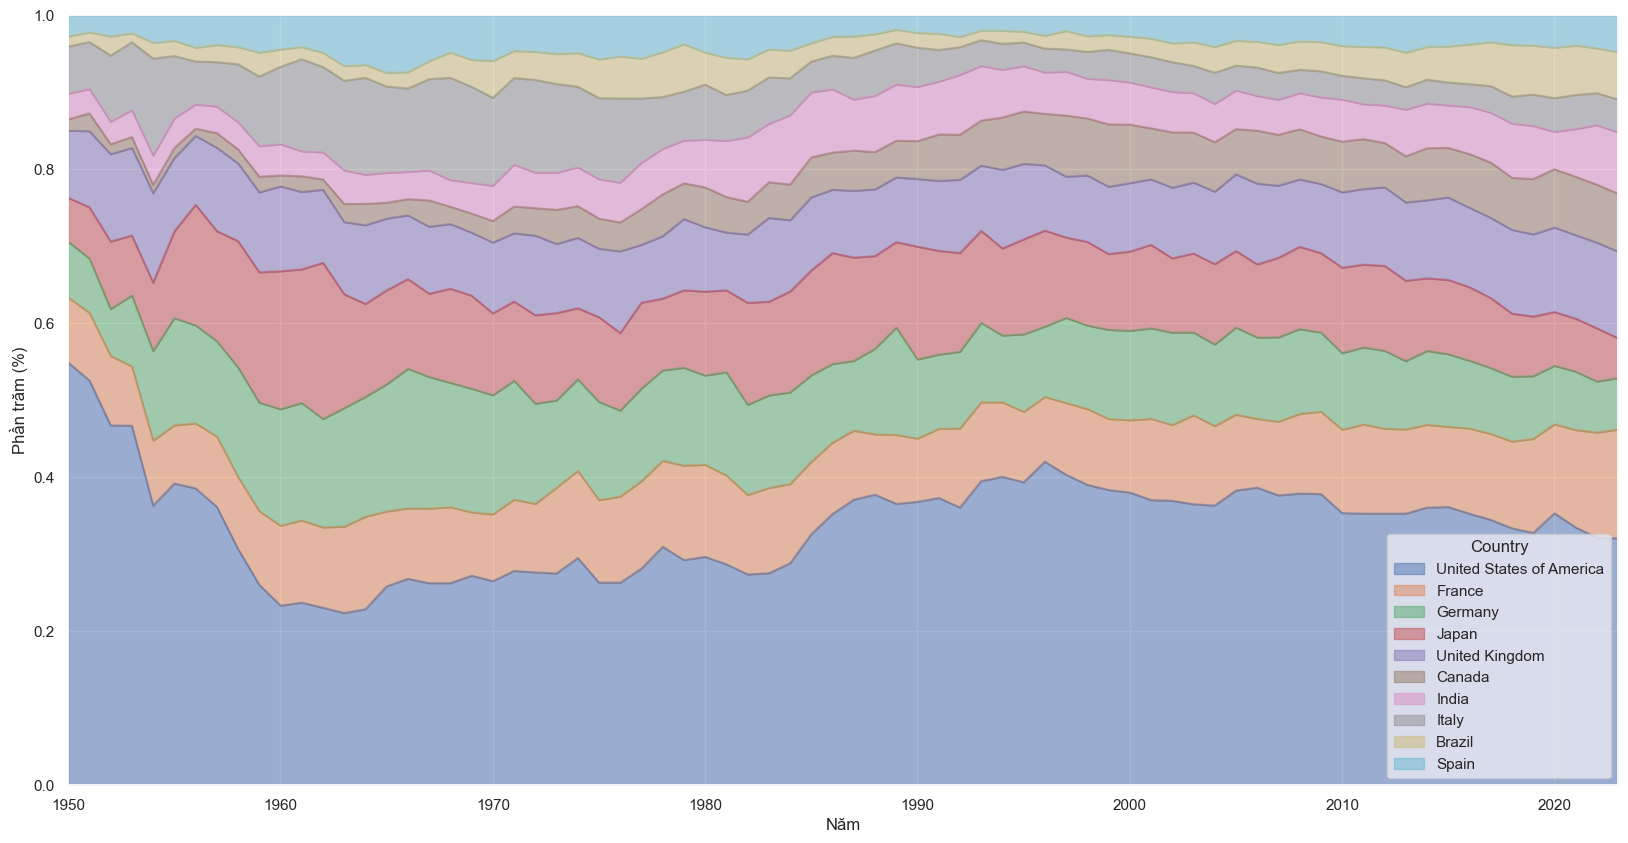

In [42]:
sns.set_theme()

ax = data_perc.plot(kind='area', stacked=True, figsize=(20,10), alpha=0.5, sharex=True )

ax.set_ylabel('Phần trăm (%)')
ax.set_xlabel('Năm')
ax.margins(0, 0)

plt.show()


**Nhận xét**
- Mỹ (United States of America) là nước có số lượng phim trong TMDB cao hơn rất nhiều so với những nước khác qua các năm.
- Từ năm 1960, thị trường Châu Âu và Châu Á đã bắt đầu lấn chiếm thị trường Mỹ. Có vẻ gần đây, thị trương phim ở các châu lục này ngày càng phát triển mạnh và TMDB đã thấy tiềm năng ở các thị trường ở các châu lục này. Tuy nhiên khá khó hiểu rằng với dân số 1 tỷ dân của Trung Quốc lại không nằm trong top 10.


**Tiếp tục phân tích**
- *Để làm rõ sự phát triển về ngànhvphim của những nước top đầu, ta sẽ tiếp tục tiến hành phân tích tiến trình phát triển mỗi nước*

In [25]:
# Từ bảng các giá trị, ta chuyển về dạng DataFrame để vẽ biểu đồ
TMDB_df_stacked = pd.DataFrame(TMDB_df.stack(0)).reset_index()
TMDB_df_stacked.columns = ['Year','Country','Films']
TMDB_df_stacked

Year                   Country  Films
0    1950.0  United States of America    674
1    1950.0                    France    104
2    1950.0                   Germany     89
3    1950.0                     Japan     70
4    1950.0            United Kingdom    107
..      ...                       ...    ...
735  2023.0                    Canada    960
736  2023.0                     India   1018
737  2023.0                     Italy    546
738  2023.0                    Brazil    787
739  2023.0                     Spain    612

[740 rows x 3 columns]

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


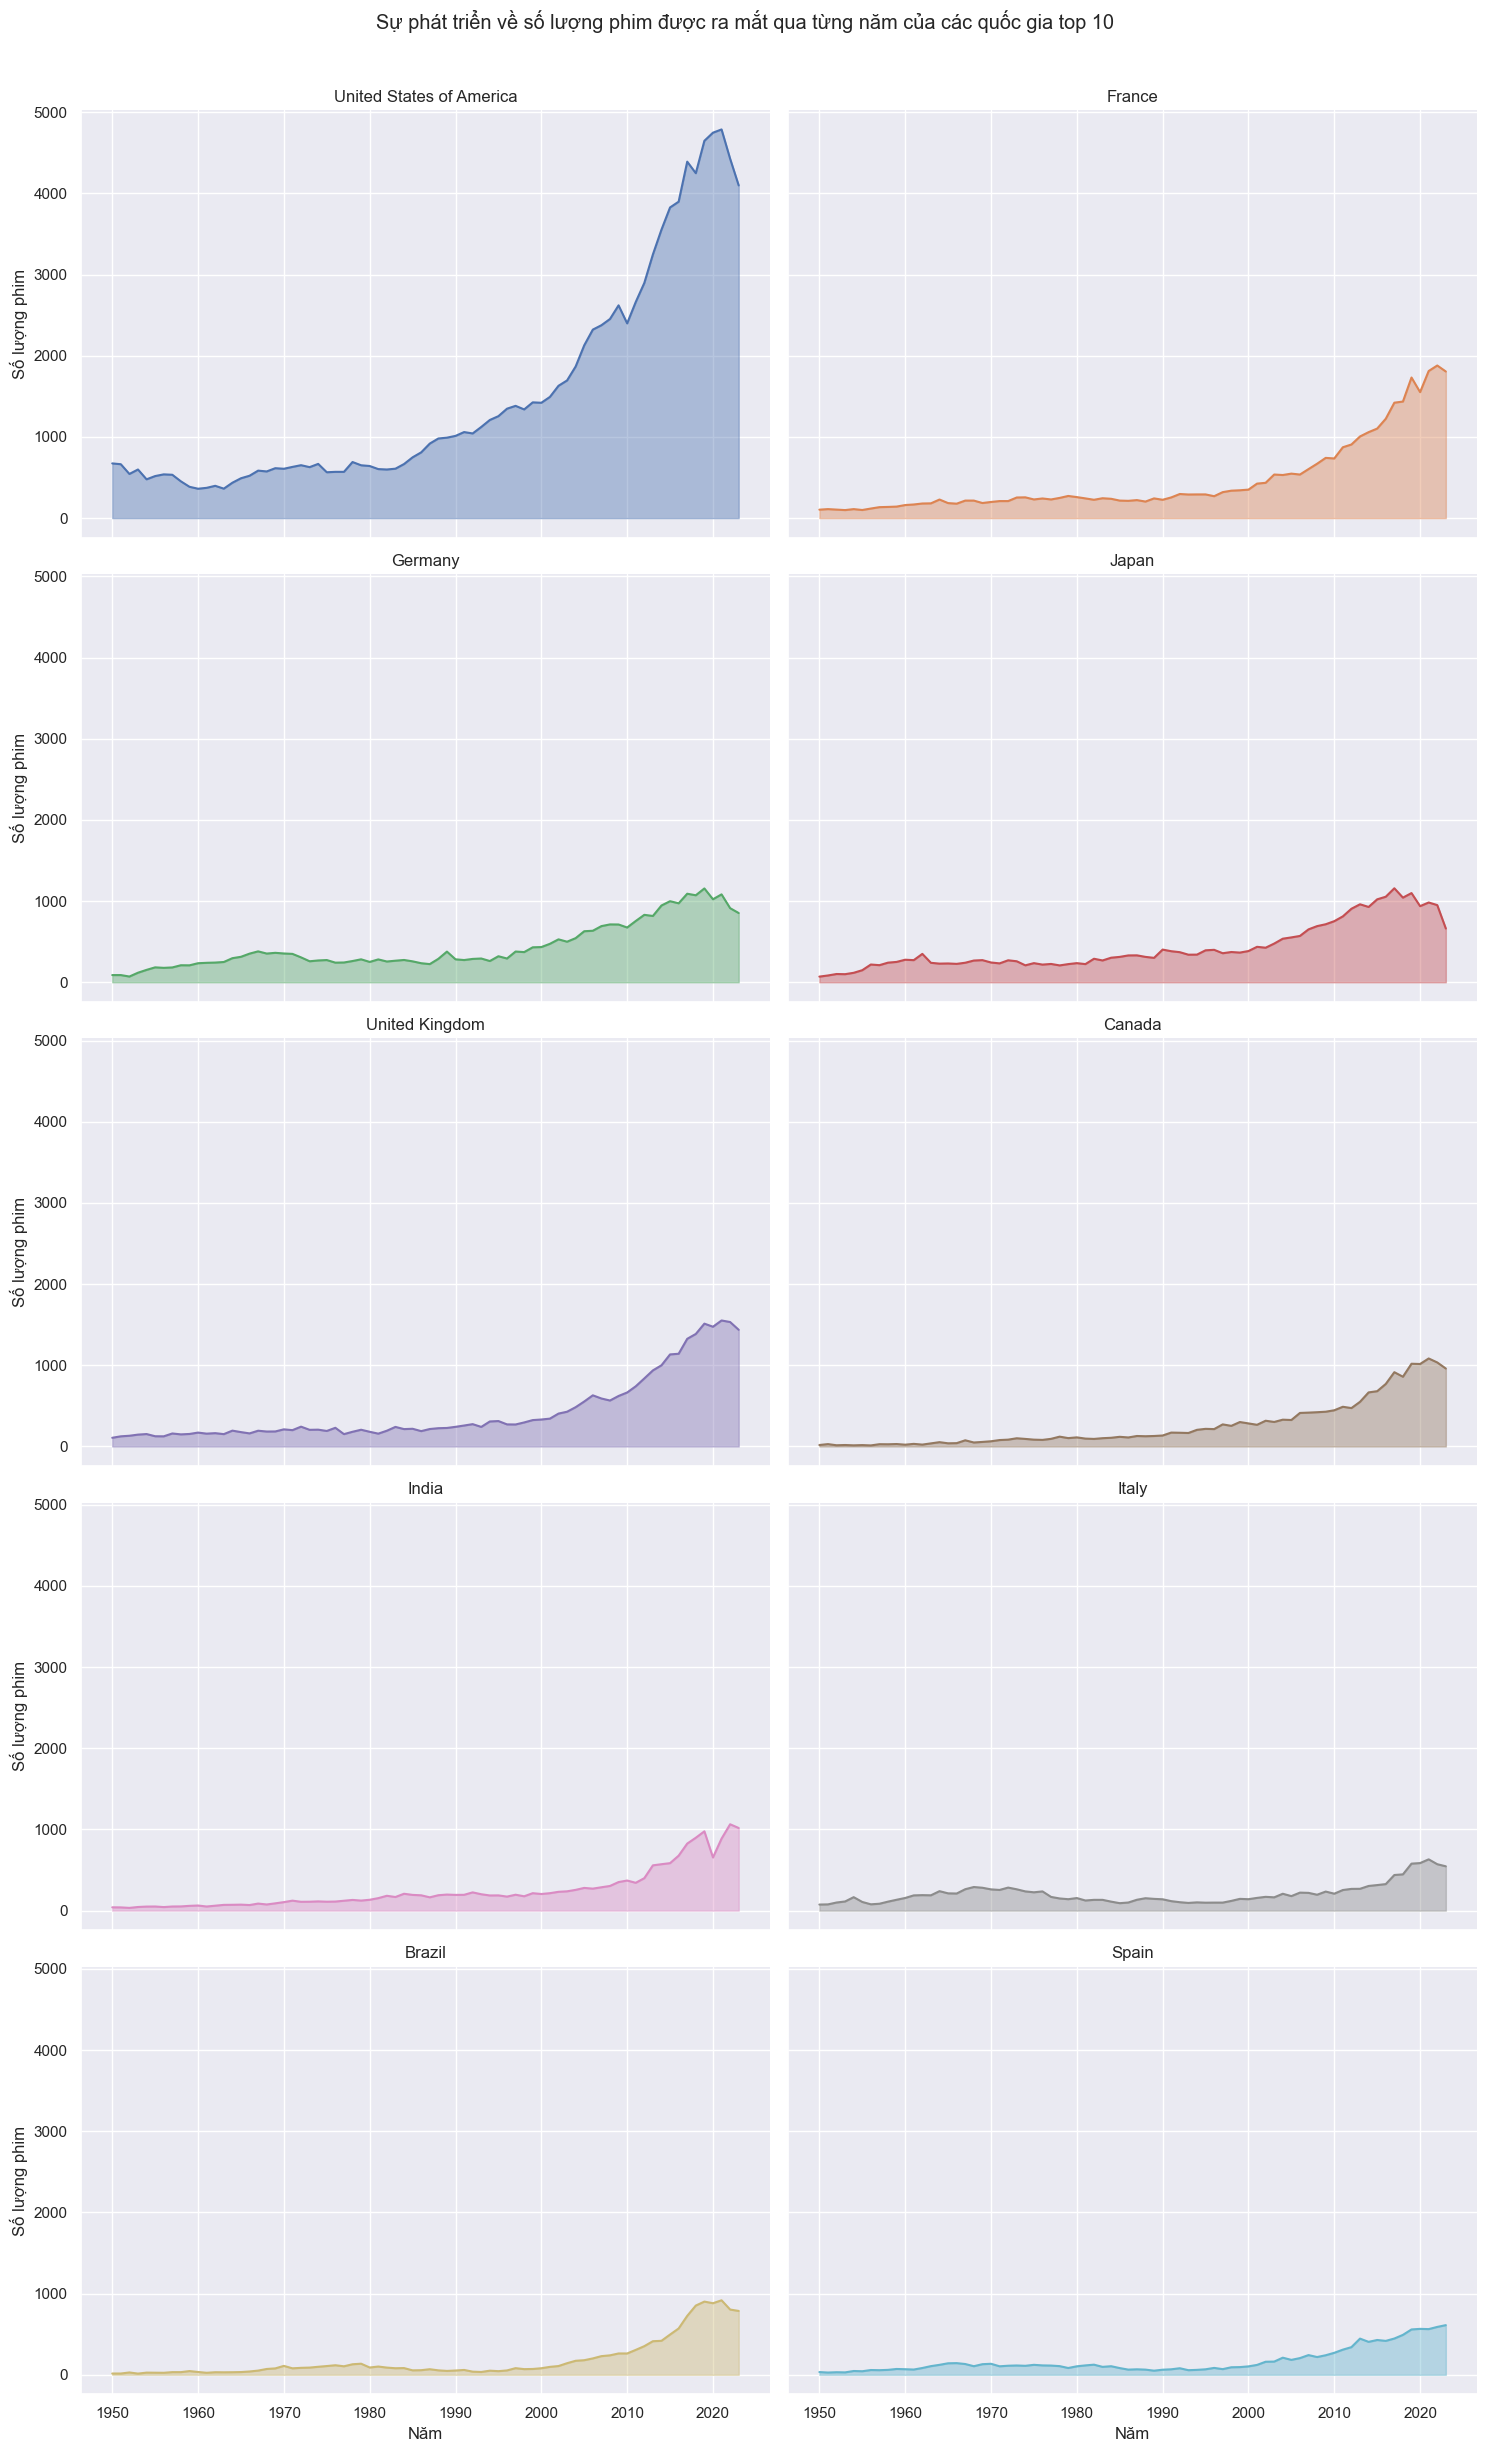

In [26]:
# Khởi tạo grid
g = sns.FacetGrid(TMDB_df_stacked, col='Country', hue='Country', 
                  col_wrap=2, height=5, aspect=1.5)

g = g.map(plt.plot, 'Year', 'Films')

# Tô màu các biểu đồ
g = g.map(plt.fill_between, 'Year', 'Films', alpha=0.4)
 
g = g.set_titles("{col_name}")
g = g.set_ylabels("Số lượng phim")
g = g.set_xlabels("Năm")

plt.subplots_adjust(top=0.94)
g = g.fig.suptitle('Sự phát triển về số lượng phim được ra mắt qua từng năm của các quốc gia top 10')

# Vẽ grid 
plt.show()


**Nhận Xét:**
- Các nước  đều có xu hướng tăng số lượng phim được ra mắt trong TMDB.
- Những năm dính Covid (2020-2021) là năm khiến nhiều nước lớn giảm sản xuất phim.


**Kiểm tra tình hình Việt Nam:**
- Việt Nam trong thời gian qua thì mảng phim hoạt động khá nhộn nhịp,do đó mục tiêu phần này là muốn xem xem tình hình phát triển của Việt Nam, liệu trong tương lai, Việt Nam có thể phát triển mạnh ở lĩnh vực phim ảnh hay không.

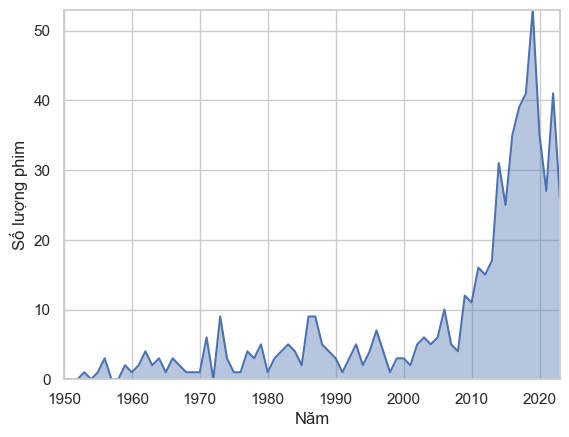

In [27]:
# Kiểm tra tình hình phát triển qua các năm
vietnam_df = TMDB_df_all.loc[:,['Vietnam']]

sns.set_theme(style="whitegrid")

ax = sns.lineplot(data=vietnam_df, x='year_release', y='Vietnam', legend=True)

plt.fill_between(x=vietnam_df.index, y1=vietnam_df.Vietnam.values, alpha=0.4)

ax.set(xlabel='Năm', ylabel='Số lượng phim')
ax.margins(0, 0)

plt.show()


In [28]:
# Các phim được thêm vào TMDB
df1.loc[df1.loc[:, 'production_countries'].apply(lambda x: 'Vietnam' in x)]\
   .sort_values(by='release_date')


id            title  vote_average  vote_count           status  \
567727  1046132       Two Worlds           0.0           0         Released   
479400  1168004          Vietnam           0.0           0         Released   
667594   390632  We Want to Live           0.0           0         Released   
433038   949708           Saigon           0.0           0         Released   
372828   980596  Krus na Kawayan           0.0           0         Released   
...         ...              ...           ...         ...              ...   
596534  1099580    The Last Wife           0.0           0  Post Production   
610194  1118343       Black Rose           0.0           0         Released   
511022  1202618        Kẻ Ăn Hồn           0.0           0  Post Production   
619917  1074087   Người Mặt Trời           0.0           0  Post Production   
515486  1222274          Quỷ Cẩu           0.0           0         Released   

       release_date  revenue  runtime  budget original_language  \
567727   1953-01-01        0       61       0                vi   
479400   1955-05-01        0       64       0                ru   
667594   1956-01-01        0       95       0                vi   
433038   1956-04-18        0        0       0                tl   
372828   1956-12-05        0       95       0                tl   
...             ...      ...      ...     ...               ...   
596534   2023-11-03        0        0       0                vi   
610194   2023-11-24        0      115       0                vi   
511022   2023-12-08        0        0       0                vi   
619917   2023-12-08        0        0       0                vi   
515486   2023-12-29        0        0       0                vi   

             original_title  \
567727         Hai thế giới   
479400              Вьетнам   
667594  Chúng Tôi Muốn Sống   
433038               Saigon   
372828      Krus na Kawayan   
...                     ...   
596534   Người Vợ Cuối Cùng   
610194        Appropriation   
511022            Kẻ Ăn Hồn   
619917       Người Mặt Trời   
515486              Quỷ Cẩu   

                                                 overview  popularity  \
567727  One of Vietnam’s first sound films, Two Worlds...       0.600   
479400  Story of the First Indochina War (1946-1954) i...       0.600   
667594  A realistic depiction of the bloody land refor...       0.655   
433038                                                NaN       0.600   
372828  Based on a true story about a valiant Vietname...       1.135   
...                                                   ...         ...   
596534  Inspired by the novel Ho Oan Han by Hong Thai,...       1.114   
610194  The story revolves around a babysitter named '...       0.916   
511022                                                NaN       0.000   
619917  Director Timothy Linh Bui said that the idea o...       0.689   
515486                                                NaN       1.400   

                             poster_path tagline          genres  \
567727  /3FllkkXm1L610Wm35lqifbx4GK3.jpg     NaN           Drama   
479400  /2KxcKFiq9s7CLcWc8WNkboIG7oQ.jpg     NaN     Documentary   
667594                               NaN     NaN      War, Drama   
433038  /kIEYUodtdugD7cH14SPfwYlblbu.jpg     NaN           Drama   
372828  /kXeARNTqjTpzxOTWky09GfDoZWj.jpg     NaN   Action, Drama   
...                                  ...     ...             ...   
596534  /dRgYeBp48TwCU84d6BR7A3VwfUi.jpg     NaN  Drama, Romance   
610194  /dFINeS3vgQoE3qZWvm82NdCmiCx.jpg     NaN        Thriller   
511022  /xihlZEVs6FqgVGR1ZvVN2FFXC4v.jpg     NaN          Horror   
619917  /56KiS2dZg05il4NmKeR7YKWzEUx.jpg     NaN          Horror   
515486  /8edHroMFaa30NlucSrlSf8j3w6W.jpg     NaN          Horror   

                                     production_companies  \
567727                                                NaN   
479400        Russian Central Studio of Documentary Films   
667594   

**Nhận xét**
- Vậy biểu đồ tăng trưởng Việt Nam tương tự như phần đông của thế giới khi phim được thêm vào năm từ năm 2000 là nhiều, có thể những năm này, TMDB đánh vào thị trường Việt Nam.
- Số lượng phim Việt Nam ra môi trường ngoài nước là rất ít so với các nước khác, tuy nhiên việc nằm trong danh sách số ít nước có phim  ở TMDB cũng cho thấy khả năng của người Việt như thế nào, có thể trong tương lai sẽ có nhiều nội dung ấn tượng để đưa Việt Nam phát triển mạnh hơn. Thị trường Việt Nam cũng được xem là thị trường tiềm năng.

### **Câu hỏi 4**: ghi nội dung ở đây<a name="cauhoi_4"></a>

**Ý nghĩa:**

### **Câu hỏi 5**: Với mỗi phim mà người dùng tìm kiếm hoặc đã xem, ta cần đề xuất thêm các phim nào với nội dung/thể loại/... tương tự cho người dùng?<a name="cauhoi_5"></a>

**Ý nghĩa:** Việc đưa ra phương pháp tiếp cận để trả lời được câu hỏi sẽ mang lại lợi ích cho người dùng và hơn nữa là lợi ích lớn cho nền tảng chiếu phim/nhà sản xuất phim.
- Đối với người dùng: việc gợi ý giúp người dùng dễ dàng tìm kiếm những bộ phim mới mà họ có thể quan tâm dựa trên sở thích và lịch sử xem phim trước đó. Từ đó giúp tiết kiệm thời gian tìm kiếm trong hàng ngàn bộ phim, nâng cao trải nghiệm và tạo điều kiện tiếp cận những bộ phim mà có thể người dùng chưa biết.
- Đối với nền tảng phân phối phim: Hệ thống gợi ý có thể tăng cường tính tương tác giữa người dùng và nền tảng. Việc cung cấp gợi ý phim chính xác giúp xây dựng ấn tượng tích cực giữa người dùng và nền tảng, tăng khả năng họ trở lại để xem thêm nhiều nội dung khác. Giống như đối với lĩnh vực âm nhạc, Spotify bằng khả năng đưa ra gợi ý chính xác giúp tăng khả năng lôi kéo và giữ chân người dùng. Ngoài ra, việc giúp người dùng tiếp cận với càng nhiều phim càng tốt (những phim phù hợp với sở thích) sẽ mang lợi nguồn lợi nhuận cho nền tảng đó.

**Thực hiện**: Khi xây dựng một hệ thống gợi ý (recommend) phim, ta có thể có hai hướng tiếp cận như sau:
- *Demographic Filtering*: Đưa ra các đề xuất chung cho mọi người dùng. Việc này dựa trên mức độ phổ biến của phim/thể loại phim, tức là các phim được đánh giá cao hay có độ phổ biến lớn sẽ được đề xuất cho người dùng. Có thể lấy ví dụ các Youtube Trending hay Global Top 10 Netflix, ... Hướng tiếp cận này quá đơn giản (do mỗi người đều có sở thích khác nhau) và chỉ đưa ra các phim có khả năng phù hợp cho đại chúng.
- *Content Based Filtering*: Đề xuất các phim có nội dung/thể loại/... tương tự dựa trên bộ phim người dùng tìm kiếm. Ý tưởng đơn giản là nếu người dùng thích một bộ phim thì có khả năng người dùng sẽ thích các bộ phim tương tự vậy.
Lúc này, ta sẽ đi qua cả hai hướng tiếp cận để cài đặt cho hệ thống gợi ý ở đây.

#### 5.1 **Demographic Filtering**: gợi ý phim dựa trên đánh giá trung bình

Tạo mới dataframe mới df3 với các thông tin cần thiết.

In [29]:
#selected_columns = ['id', 'title', 'release_date', 'vote_average', 'vote_count', 'poster_path', 'adult', 'original_language', 'overview', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
selected_columns = ['id', 'title', 'release_date', 'vote_average', 'vote_count', 'poster_path', 'original_language', 'overview', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
df3 = df[selected_columns]
df3 = df3.fillna('')
df3.head(2)

id         title release_date  vote_average  vote_count  \
0   27205     Inception   2010-07-15         8.364       34495   
1  157336  Interstellar   2014-11-05         8.417       32571   

                        poster_path original_language  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg                en   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg                en   

                                            overview  \
0  Cobb, a skilled thief who commits corporate es...   
1  The adventures of a group of explorers who mak...   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   

                     spoken_languages  
0  English, French, Japanese, Swahili  
1                             English

Tiếp theo, ta tiến hành tính điểm cho mỗi bộ phim để sắp xếp các phim theo thứ tự đánh giá cao nhất đến thấp nhất.<br>
Ở đây, để sắp xếp các bộ phim theo đánh giá, ta không thể sử dụng giá trị `vote_average` để đảm bảo tính công bằng (Ví dụ một bộ phim có điểm rất cao nhưng số vote lại rất ít sẽ không thể so sánh với một bộ phim có điểm thấp hơn nhưng số vote rất cao). Do đó, ta sẽ sử dụng weighted rating (điểm đánh giá có trọng số) được tính như sau: $$\text{Weighted Rating: }wr = \left(\dfrac{v}{v+m}\times R\right)\left(\dfrac{m}{v+m}\times C\right)$$
Trong đó:
+ $v$: số lượng vote `vote_count`
+ $m$: số lượng vote ít nhất cần thiết để có thể tính $wr$.
+ $R$: điểm vote trung bình `vote_average`.
+ $C$: điểm vote trung bình toàn bộ dataset.
<br>

Đầu tiên ta tính giá trị $C$ và xác định giá trị $m$

In [30]:
#Giá trị vote trung bình toàn bộ dataset
C = df3.loc[:, 'vote_average'].mean()
#Xác định giá trị m: để được xếp là phim phổ biến thì nó phải có số vote hơn 98% số phim
m = df3.loc[:, 'vote_count'].quantile(0.98)

Ta lọc các phim đáp ứng điều kiện và tính Weighted Rating ($wr$).

In [31]:
best_rating_movie = df3.copy().loc[df3['vote_count'] >= m]
best_rating_movie['weighted_vote'] = (best_rating_movie['vote_count']/(best_rating_movie['vote_count']+m)*best_rating_movie['vote_average']) + (m/(best_rating_movie['vote_count']+m)*C)
best_rating_movie = best_rating_movie.sort_values('weighted_vote', ascending=False)

In [32]:
#show top movie
def gettop_movie(year=None):
    if year is None:
        best_rating_movie = df3.copy().loc[df3['vote_count'] >= m]
    else:
        best_rating_movie = df3[df3['release_date'].dt.year == int(year)].copy().loc[df3['vote_count'] >= m]
    #
    best_rating_movie['weighted_vote'] = (best_rating_movie['vote_count']/(best_rating_movie['vote_count']+m)*best_rating_movie['vote_average']) + (m/(best_rating_movie['vote_count']+m)*C)
    best_rating_movie = best_rating_movie.sort_values('weighted_vote', ascending=False)
    return best_rating_movie
    
def showtop_movie(movie = 5, year = None):
    best_rating_movie = gettop_movie(year)
    fig, ax = plt.subplots(1, movie , figsize=(25,10))
    ax = ax.flatten()
    for i in range(movie):
        try:
            ax[i].axis('off')
            ax[i].set_title(best_rating_movie.iloc[i].title, fontsize=22)
            a = io.imread('https://image.tmdb.org/t/p/w500/' + best_rating_movie.iloc[i].poster_path)
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    if year is None:
        fig.suptitle('Top ' + str(movie) + ' movies of all time', fontsize = 28)
    else:
        fig.suptitle('Top ' + str(movie) + ' movies of ' + str(year), fontsize = 28)
    fig.show()

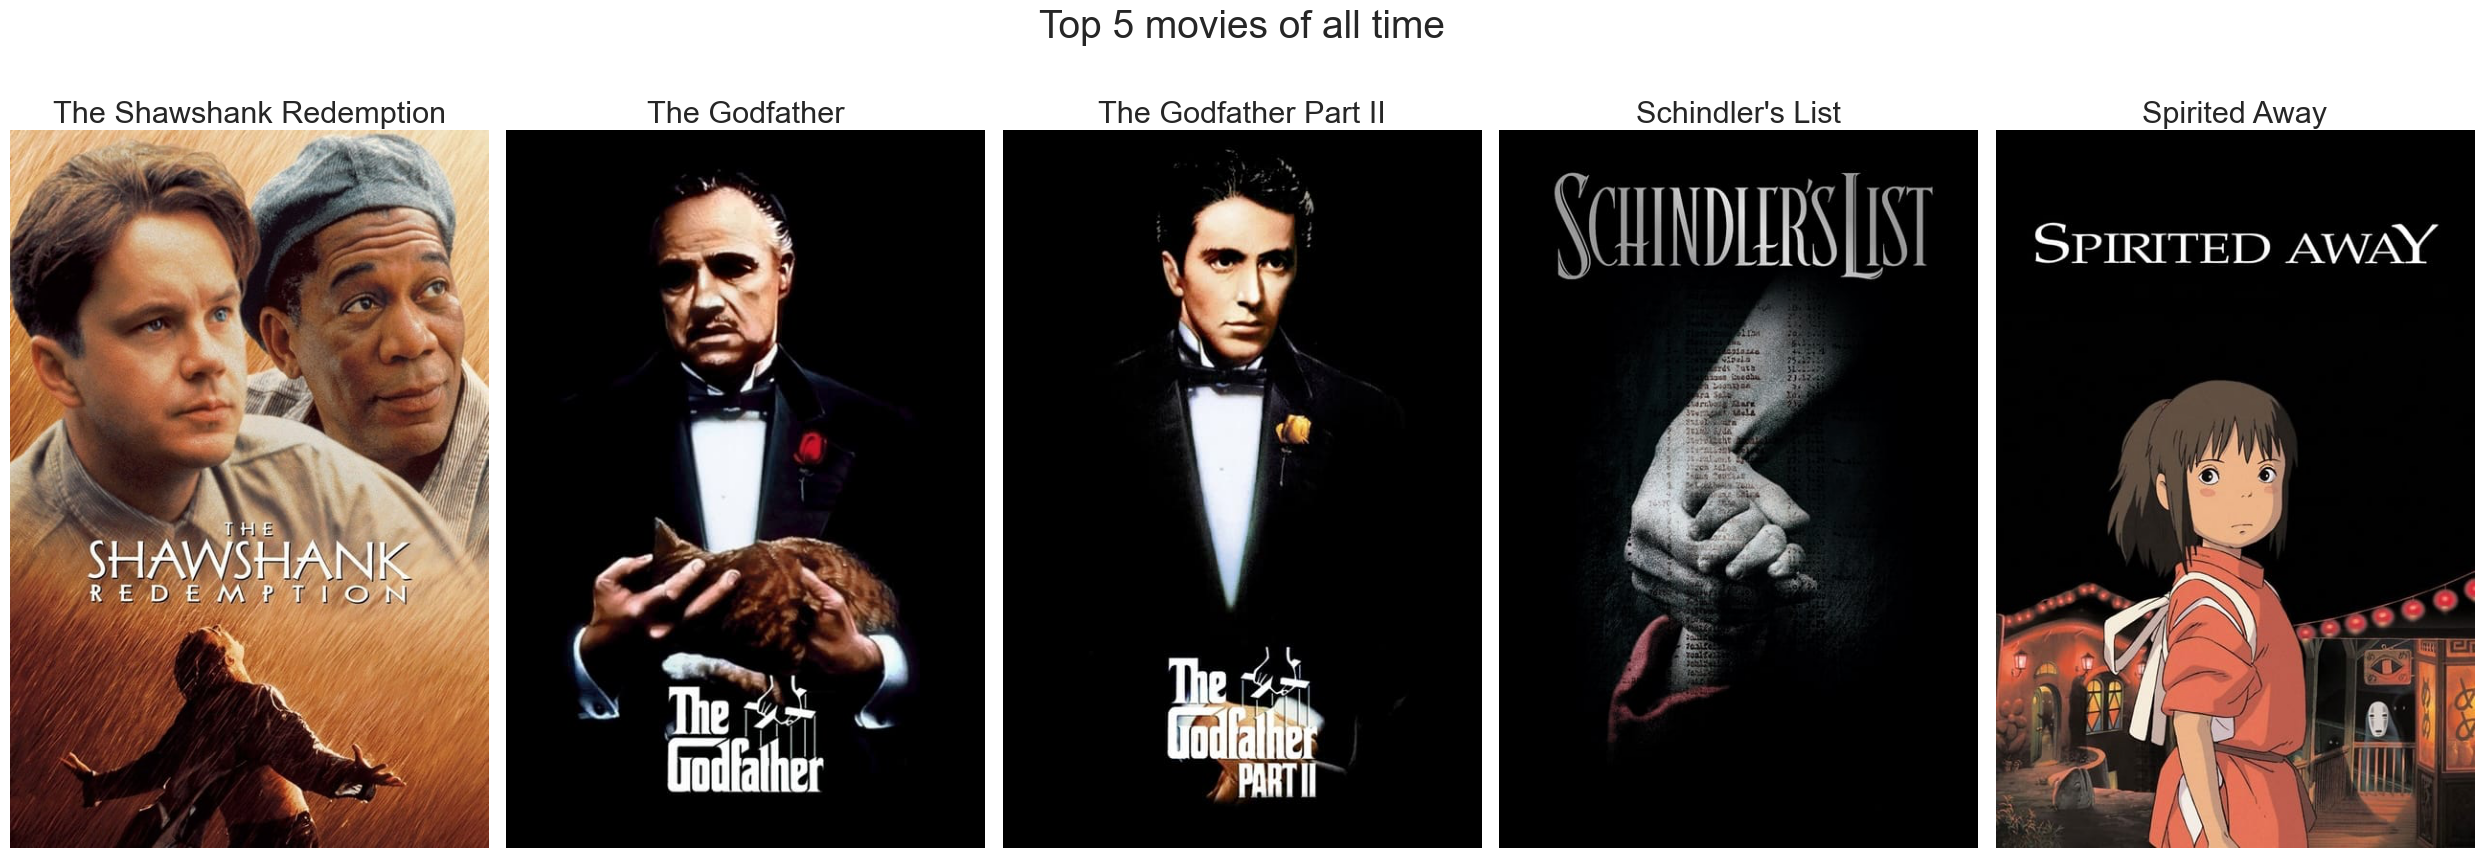

In [33]:
#Top 5 phim phổ biển trong toàn bộ các phim
showtop_movie(5)

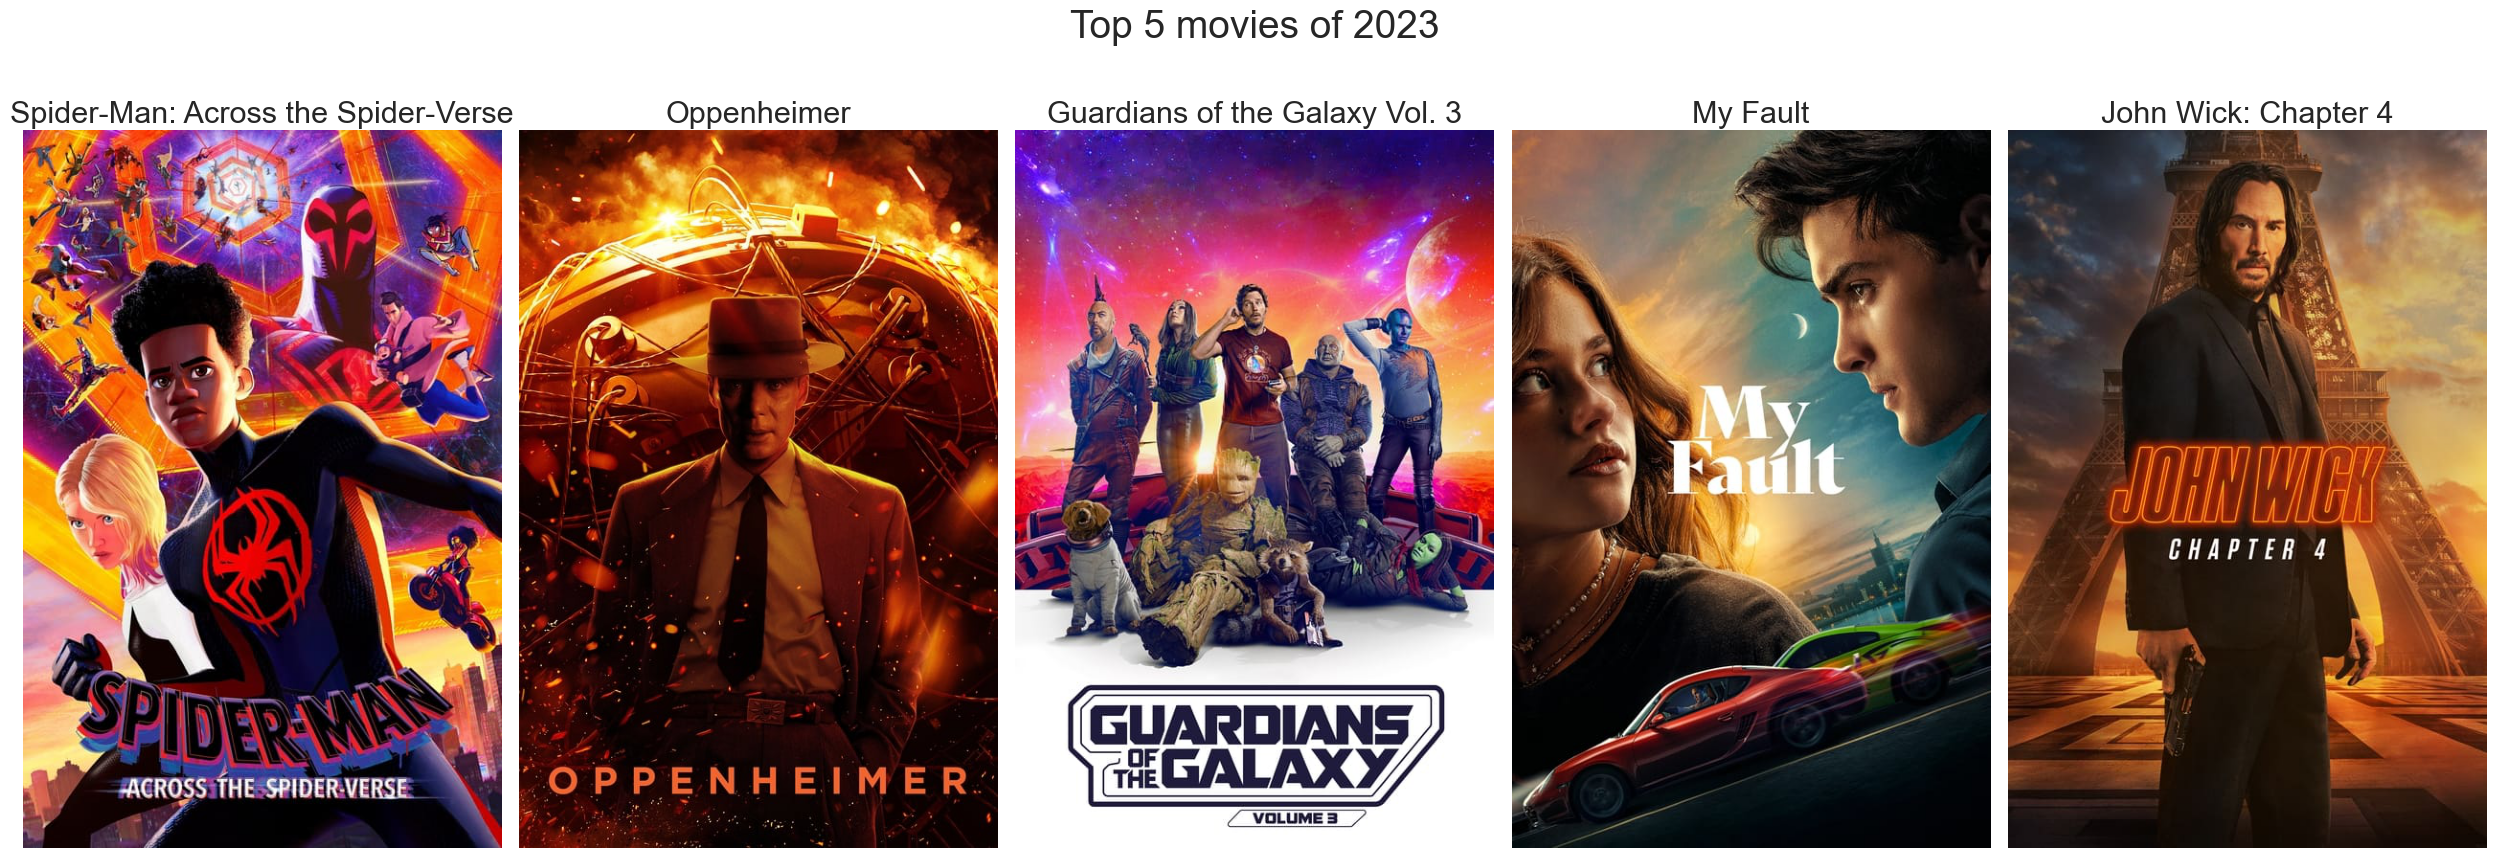

In [34]:
#Top 5 phim phổ biển nhất năm 2023
showtop_movie(5, 2023)

#### 5.2 **Content Based Filtering**: gợi ý phim dựa trên mức độ tương đồng với tìm kiếm.

- Đầu tiên ta lựa chọn các cột có liên quan đến thông tin phim nhằm đánh giá độ tương đồng để dự đoán những phim mà tương đồng với sở thích người dùng. Ta sẽ lựa chọn các yếu tố để rút trích đặc trưng, bao gồm: [`adult`, `original_language`, `overview`, `tagline`, `genres`, `production_companies`, `production_countries`, `spoken_languages`].
- Việc đưa ra các yếu tố đó để đánh giá mức độ liên quan của các bộ phim có thể hiểu thông qua một vài ví dụ sau:
    - Với thể loại phim hành động (genres), người ta thường sẽ thích các phim hành động âu mỹ (production_countries) tuy nhiên ở đây sẽ chia thành 2 kiểu, một kiểu sẽ thích các phim hành động không có quá nhiều yếu tố bạo lực (siêu anh hùng), một kiểu sẽ ưu thích các bộ phim bạo lực hơn và sẽ không phù hợp cho các lứa tuổi nhỏ (adult). 
    - Với các phim hoạt hình (genres), sẽ có người thích cách kể chuyện của Âu Mĩ (Pixar, Disney, ...) hoặc của Châu Á (Studio Ghibli).
    - Với các phim gia đình, tình cảm, người ta cũng sẽ thường lựa chọn theo hai xu hương Âu-Mĩ (Pháp, Thụy Điển, ...) hoặc Châu Á (Hàn Quốc, Trung Quốc, Thái Lan, ...)
    - Các phần như 'tagline', 'overview' cũng sẽ thể hiện một phần nào đó nội dung phim để ta có thể tìm kiếm những bộ có nội dung tương tự.

In [35]:
selected_columns = ['original_language', 'overview', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

Ta tạo cột `summary` nhằm tổng hợp tất cả thông tin từ các cột đã lựa chọn cho quá trình rút trích đặc trưng.

In [36]:
df3.loc[:, 'summary'] = ''
df3.summary = df3.original_language + ' ' + df3.spoken_languages.apply(lambda x: ' '.join(x.split(','))) + ' ' + df3.overview + ' ' + df3.tagline  + ' ' + df3.genres.apply(lambda x: ' '.join(x.split(','))) + ' ' + df3.production_companies.apply(lambda x: ' '.join(x.split(','))) + ' ' + df3.production_countries.apply(lambda x: ' '.join(x.split(',')))
df3.loc[:, 'summary'].head()

0    en English  French  Japanese  Swahili Cobb, a ...
1    en English The adventures of a group of explor...
2    en English  Mandarin Batman raises the stakes ...
3    en English  Spanish In the 22nd century, a par...
4    en English  Hindi  Russian When an unexpected ...
Name: summary, dtype: object

Trích xuất đặc trưng sử dụng TF-IDF

In [37]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df3['summary'])
tfidf_matrix.shape

(883217, 429309)

Chúng ta sẽ tính điểm tương đồng theo cặp cho tất cả các phim dựa trên TF-IDF vừa tính được và đề xuất phim dựa trên các đề xuất đó.

In [38]:
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df3.index[df3['title'] == title][0]
    
    if df3.loc[idx, 'poster_path'] != ' ' and df3.loc[idx, 'poster_path'] is not None:
        poster = io.imread(f'https://image.tmdb.org/t/p/w500/{df3.loc[idx, "poster_path"]}')
        plt.imshow(poster)
        plt.axis('off')
        plt.title(title)
        plt.show()
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 8 most similar movies
    sim_scores = sim_scores[1:9]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 8 most similar movies
    result = df3.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i in range(8):
        try:    
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title, fontsize=15)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/' + result.iloc[i].poster_path)
            ax[i].imshow(a)
        except:
            try:
                ax[i].axis('off')
                ax[i].set_title(result.iloc[i].title, fontsize=15)
                a = io.imread(f'https://www.themoviedb.org/t/p/original/uc4RAVW1T3T29h6OQdr7zu4Blui.jpg')
                ax[i].imshow(a)
            except: pass
    fig.tight_layout()
    fig.show()

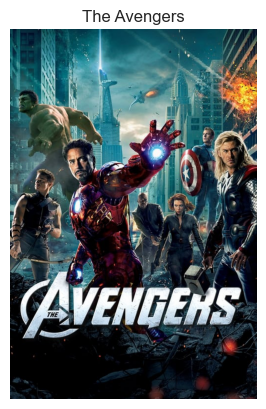

In [ ]:
get_recommendations('The Avengers')

# **Phase 5**: Reflection

## 5.0 Team members

**Văn Bá Bảo Huy**
- Khó khăn:
    - Tìm kiếm bộ dữ liệu có các thông tin đa dạng để có thể thực hiện nhiều phân tích.
    - Xử lí dữ liệu để đưa ra câu trả lời cho câu hỏi tự đặt ra sao cho phù hợp.
    - Sử dụng github đối với loại file ipynb.
- Điều đã học được:
    - Sử dụng github đối với loại file ipynb.
    - Quá trình xử lý và hiển thị dữ liệu sao cho phù hợp nhất để đảm bảo việc truyền đạt thông tin.

**Nguyễn Thị Gái**
- Khó khăn:
- Điều đã học được:

**Nguyễn Thị Thanh Hoa**
- Khó khăn:
  - Chọn câu hỏi có ý nghĩa cần trả lời từ bộ dữ liệu này.
  - Tìm loại đồ thị nào để thể hiện dữ liệu đó cũng như xây dựng.
  - Sử dụng github để làm việc nhóm.
- Điều đã học được:
  - Nắm vững hơn các thư viện như pandas cho biến đổi dataframe cho các thao tác với dữ liệu , matplotlib, seaborn cho vẽ biểu đồ trực quan.
  - Tìm kiếm bất thương trong dữ liệu.
  - Rèn luyện kĩ năng đưa ra từng bước để phân tích, giải quyết một câu hỏi
  - Học hỏi thêm thao tác tiền xử lý, khám phá dữ liệu và đặt câu hỏi từ các tài liệu tham khảo.
  - Sử dụng gihub thành thạo hơn (ở mức cơ bản).

## 5.1 Team

Nếu có nhiều thời gian hơn, nhóm sẽ ...